In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('final_clusters_data.csv')

# Извините, здесь не успели навести порядок

In [6]:
df = df.fillna(0)

In [7]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'сумма всех заказов', 'все заказы',
       'format_name_0', 'format_name_1', 'format_name_2', 'format_name_3',
       'format_name_4', 'format_name_5', 'format_name_6', 'format_name_7',
       'format_name_8', 'buy_post', 'date_diff_post', 'cluster_0', 'cluster_1',
       'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6',
       'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10', 'cluster_11',
       'cluster_12', 'cluster_13', 'cluster_14', 'cluster_15'],
      dtype='object')

In [8]:
df.drop('все заказы', axis= 1 , inplace= True )

In [9]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'сумма всех заказов', 'format_name_0',
       'format_name_1', 'format_name_2', 'format_name_3', 'format_name_4',
       'format_name_5', 'format_name_6', 'format_name_7', 'format_name_8',
       'buy_post', 'date_diff_post', 'cluster_0', 'cluster_1', 'cluster_2',
       'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7',
       'cluster_8', 'cluster_9', 'cluster_10', 'cluster_11', 'cluster_12',
       'cluster_13', 'cluster_14', 'cluster_15'],
      dtype='object')

In [10]:
df

,Unnamed: 0,customer_id,сумма всех заказов,format_name_0,format_name_1,format_name_2,format_name_3,format_name_4,format_name_5,format_name_6,...,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15
0,0,29891,5087.35,0.0,0.0,2.0,0.0,0.0,0.0,23.0,...,1,0,5,9,3,2,0,3,2,0
1,1,30477,5675.60,0.0,0.0,25.0,0.0,0.0,0.0,0.0,...,0,2,0,7,20,0,6,17,2,0
2,2,31426,9393.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,3,18,0,5,36,3,0
3,3,44491,514.90,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0,0,0,0,2,0,0,7,0,0
4,4,44939,1664.83,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,3,1,0,3,0,6,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,46624509,935.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,3,3,0,2,1,0,0
499996,499996,46625265,1199.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,2,0,4,4,0,0
499997,499997,46639170,1089.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,0,0,0,1,0,1,1,0,2
499998,499998,46654016,1219.93,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0,0,0,2,0,0,0,1,1,0


In [11]:
df = df.drop(columns='Unnamed: 0')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X = df.drop(columns='date_diff_post')
Y = df['date_diff_post']

TEST_SIZE = 0.1
RANDOM_STATE = 42

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [13]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import utils
from keras.models import Model
from tensorflow.keras.models import load_model
import h5py
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [14]:
import xgboost as xgb


In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
regressor=xgb.XGBRegressor(n_estimators=10)
regressor.fit(train_X, train_y)
sqrt(mean_squared_error(test_y, regressor.predict(test_X)))

12.402785583022014

In [64]:
regressor=xgb.XGBRegressor(n_estimators=50, subsample  = 0.9)
regressor.fit(train_X, train_y)
sqrt(mean_squared_error(test_y, regressor.predict(test_X)))

12.287308667740032

In [72]:
from lightgbm import LGBMRegressor
regressor= LGBMRegressor(n_estimators=60)
regressor.fit(train_X, train_y)
sqrt(mean_squared_error(test_y, regressor.predict(test_X)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1664
[LightGBM] [Info] Number of data points in the train set: 450000, number of used features: 27
[LightGBM] [Info] Start training from score 17.436698


12.283574695504885

In [73]:
dftest = pd.read_csv("final_clusters_test_data.csv")
dftest = dftest.drop(columns='Unnamed: 0')
submit = pd.read_csv("submission_1.csv",)
dftest = dftest.merge(submit.drop(columns='date_diff_post'), on='customer_id', how='left')
preds = regressor.predict(dftest.drop(columns='все заказы').values)
submit['date_diff_post'] = preds
submit.to_csv('submission_1.csv', index = False)

In [42]:
from optuna import create_study, logging
from optuna.pruners import MedianPruner
from optuna.integration import XGBoostPruningCallback


In [53]:
def objective(trial):
    eta =  trial.suggest_loguniform('eta', 1e-8, 1.0)
    gamma = trial.suggest_loguniform('gamma', 1e-8, 1.0)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_child_weight = trial.suggest_loguniform('min_child_weight', 1e-8, 1.0)
    max_delta_step = trial.suggest_loguniform('max_delta_step', 1e-8, 1.0)
    subsample = trial.suggest_uniform('subsample', 0.0, 1.0)
    reg_lambda = trial.suggest_uniform('reg_lambda', 0.0, 1000.0)
    reg_alpha = trial.suggest_uniform('reg_alpha', 0.0, 1000.0)
    
  
    regr =xgb.XGBRegressor(eta = eta, gamma = gamma, max_depth = max_depth,
                           min_child_weight = min_child_weight, max_delta_step = max_delta_step,
                           subsample = subsample,reg_lambda = reg_lambda,reg_alpha = reg_alpha)
 
    score = cross_val_score(regr, X_train, y_train, cv=5, scoring="r2")
    r2_mean = score.mean()
    print(r2_mean)
 
    return r2_mean
 
#Find the optimal value with optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500

In [54]:
import optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=3)

[I 2023-11-25 08:10:05,918] A new study created in memory with name: no-name-14734201-35d9-4c96-b427-492aedb3d8c5
[W 2023-11-25 08:10:06,086] Trial 0 failed with parameters: {'learning_rate': 0.022763637886161328, 'max_depth': 2, 'subsample': 0.49997715174445373, 'colsample_bytree': 0.43156806993642854, 'min_child_weight': 15} because of the following error: TypeError("'tuple' object cannot be interpreted as an integer").
Traceback (most recent call last):
  File "c:\users\ernes\appdata\local\programs\python\python37\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Ernes\AppData\Local\Temp\ipykernel_12196\853080280.py", line 12, in objective
    model.fit(train_X, train_y, verbose=False)
  File "c:\users\ernes\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py", line 575, in inner_f
    return f(**kwargs)
  File "c:\users\ernes\appdata\local\programs\python\python37\lib\site-packages\xgboost\s

TypeError: 'tuple' object cannot be interpreted as an integer

In [166]:
df[(df['date_diff_post'].isnull()) & (df['buy_post'] == 0)]

,Unnamed: 0,customer_id,сумма всех заказов,format_name_0,format_name_1,format_name_2,format_name_3,format_name_4,format_name_5,format_name_6,...,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15
5,5,45006,1567.84,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,2,0,4,2,0,0,3,1,0
11,11,45303,3425.70,0.0,17.0,0.0,0.0,0.0,0.0,6.0,...,3,0,2,2,7,0,0,5,2,1
24,24,102488,1121.87,0.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0,0,0,1,8,0,0,5,0,0
29,29,119045,1190.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,2,0,0,0
36,36,157470,2037.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2,1,1,0,0,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499991,499991,46599400,799.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,2,0,0
499992,499992,46606537,1465.85,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,5,2,0,0,1,0,0
499995,499995,46624509,935.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,3,3,0,2,1,0,0
499996,499996,46625265,1199.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,2,0,4,4,0,0


In [272]:
model = Sequential()
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(1,))
model.compile(optimizer='Adam', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(train_X, train_y, batch_size=256, epochs=5, validation_split=0.1, verbose=0)
sqrt(mean_squared_error(test_y, model.predict(test_X)))

1563/1563 [==============================] - 1s 753us/step


564.1001479920006

In [273]:
19.396363306018742
500

500

In [291]:
#импорты библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.models import Model
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [ ]:
import tensorflow as tf
import keras
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
model = Sequential()
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(1,))
model.compile(optimizer='RMSprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(train_X, train_y, batch_size=256, epochs=300, validation_split=0.1, verbose=0, callbacks = callback)
sqrt(mean_squared_error(test_y, model.predict(test_X)))

In [308]:
import tensorflow as tf
import keras
for i in range (1, 10):
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
    opt = keras.optimizers.RMSprop(lr=i * 0.01)
    model = Sequential()
    model.add(Dense(300, activation='relu'))
    model.add(Dense(400, activation='relu'))
    model.add(Dense(1,))
    model.compile(optimizer='RMSprop', loss='mse', metrics=['mean_absolute_error'])
    history = model.fit(train_X, train_y, batch_size=256, epochs=5, validation_split=0.1, verbose=0, callbacks = callback, )
    abc = sqrt(mean_squared_error(test_y, model.predict(test_X)))
    print(i, abc)
    print(model.optimizer.get_config())

SyntaxError: keyword argument repeated (4053916601.py, line 10)

In [ ]:
callbacks = callback fit

In [309]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
model = Sequential()
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(1,))
model.compile(optimizer='RMSprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(train_X, train_y, batch_size=256, epochs=300, validation_split=0.1, verbose=0, callbacks = callback)
sqrt(mean_squared_error(test_y, model.predict(test_X)))

1563/1563 [==============================] - 1s 837us/step


17.20038441571407

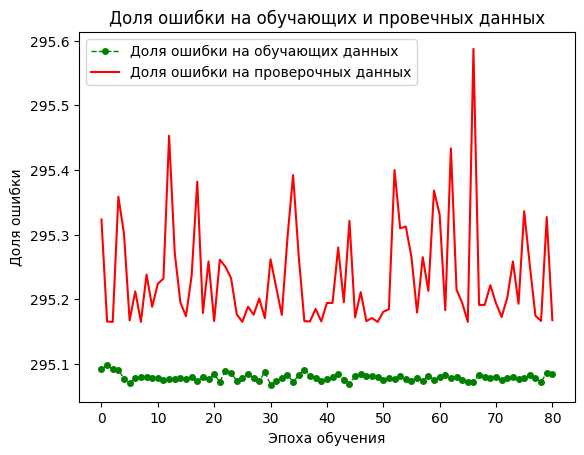

In [311]:
import matplotlib.pyplot as plt
#График без регуляризацией
plt.title('Доля ошибки на обучающих и провечных данных')
plt.plot(history.history['loss'][5:], 'go', linewidth=1, markersize=4, linestyle='--',
         label='Доля ошибки на обучающих данных')
plt.plot(history.history['val_loss'][5:], 'r', linewidth=1.5, markersize=1, linestyle='-',
         label='Доля ошибки на проверочных данных')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля ошибки'),
plt.legend()
plt.show();

In [226]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [227]:
sqrt(mean_squared_error(test_y, model.predict(test_X)))

1563/1563 [==============================] - 1s 729us/step


23.94840246385556

In [186]:
def rmse(ytrue, ypred):
    n = len(ytrue)
    squarederrors = (test_y[i - ypred[i])**2 for i in range(n)]
    mse = sum(squarederrors) / n
    rmse = mse  0.5
    return rmse

In [ ]:
print(rmse(y_true, y_pred))

In [228]:
dftest = pd.read_csv("final_clusters_test_data.csv")
dftest = dftest.drop(columns='Unnamed: 0')
submit = pd.read_csv("submission_1.csv",)
dftest = dftest.merge(submit.drop(columns='date_diff_post'), on='customer_id', how='left')
preds = model.predict(dftest.drop(columns='все заказы').values)
submit['date_diff_post'] = preds
submit.to_csv('submission_1.csv', index = False)

In [231]:
preds = model.predict(dftest.drop(columns='все заказы').values)

3511/3511 [==============================] - 3s 756us/step


In [234]:
submit['date_diff_post'] = preds
submit.to_csv('submission_1.csv', index = False)

In [41]:
drop_columns = ['group_name', 'customer_id', 'startdatetime']
LabelEncoder_columns = ['dish_name', 'format_name']
target_columns = ['buy_post', 'date_diff_post']

In [42]:
df = df.drop(columns=drop_columns)

In [43]:
from sklearn.preprocessing import LabelEncoder

for col in LabelEncoder_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [44]:
df = df.fillna(0)

In [45]:
mini_df = df[['customer_id', 'startdatetime']].drop_duplicates()

KeyError: "None of [Index(['customer_id', 'startdatetime'], dtype='object')] are in the [columns]"

In [46]:
s = list(df[(df['customer_id'] == 30984546) & (df['startdatetime'] == '2023-06-24 11:13:57')]['dish_name'])

KeyError: 'customer_id'

In [47]:
s = str(s)

In [48]:
mini_df[mini_df['customer_id'] == 30984546]['startdatetime']

10159440    2023-06-12 02:17:26
10159441    2023-06-13 00:31:40
10159447    2023-06-24 11:13:57
10159451    2023-07-12 15:18:57
10159467    2023-07-12 23:19:48
10159471    2023-07-12 23:34:00
10159472    2023-07-21 01:02:07
10159473    2023-07-31 00:21:01
10159477    2023-07-31 00:34:55
10159479    2023-07-31 00:42:36
10159480    2023-08-01 23:57:36
Name: startdatetime, dtype: object

In [49]:
mini_df['заказ'] = np.zeros(len(mini_df))
mini_df['сумма заказа'] = np.zeros(len(mini_df))
for i in range(len(mini_df)):
    mini_df.loc['сумма заказа', i] = df[(df['customer_id'] == mini_df['customer_id'][i]) & (df['startdatetime'] == mini_df['startdatetime'][i])]['revenue'].sum()
    mini_df.loc['заказ', i] = list(df[(df['customer_id'] == mini_df['customer_id'][i]) & (df['startdatetime'] == mini_df['startdatetime'][i])]['dish_name'])
mini_df

KeyError: 'customer_id'

In [50]:
mini_df.sort_values(by='startdatetime', ascending=False)

,customer_id,startdatetime,заказ,сумма заказа,0
12052065,44695278.0,2023-08-01 23:57:46,0.0,0.0,NaN
10159480,30984546.0,2023-08-01 23:57:36,0.0,0.0,NaN
6682376,22436078.0,2023-08-01 23:54:12,0.0,0.0,NaN
11819863,41586357.0,2023-08-01 23:54:09,0.0,0.0,NaN
12125210,46198579.0,2023-08-01 23:53:26,0.0,0.0,NaN
...,...,...,...,...,...
2911920,9876699.0,2022-09-02 00:02:21,0.0,0.0,NaN
10713802,34478910.0,2022-09-02 00:02:12,0.0,0.0,NaN
7847295,24774791.0,2022-09-02 00:00:39,0.0,0.0,NaN
сумма заказа,NaN,NaN,0.0,0.0,389.97


In [51]:
df

,Unnamed: 0,date_diff_post,buy_post,revenue,dish_name,ownareaall_sqm,format_name
0,0,9.0,1,69.99,589,300.0,2
1,1,9.0,1,190.00,982,300.0,2
2,2,9.0,1,9.99,900,300.0,2
3,3,9.0,1,119.99,1035,300.0,2
4,4,9.0,1,119.99,625,300.0,2
...,...,...,...,...,...,...,...
12129379,24261974,0.0,0,7.99,1021,300.0,8
12129380,24261975,0.0,0,84.98,501,300.0,8
12129381,24261976,0.0,0,70.03,719,300.0,8
12129382,24261977,0.0,0,19.00,916,300.0,8


In [40]:
df['group_name'].value_counts()

train    12129384
Name: group_name, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X = df.drop(columns=target_columns)
Y = df['date_diff_post']

TEST_SIZE = 0.2
RANDOM_STATE = 42

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [77]:
train_X.columns

Index(['Unnamed: 0', 'revenue', 'dish_name', 'ownareaall_sqm', 'format_name'], dtype='object')

In [121]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import utils
from keras.models import Model
from tensorflow.keras.models import load_model
import h5py
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [125]:
# Задаем сеть
model = Sequential()
# Первый слой
model.add(Dense(100, input_shape=(train_X.shape[1],)))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1,))

In [126]:
model.compile(optimizer='Adagrad', loss='mse', metrics=['mean_absolute_error'])

In [127]:
history = model.fit(train_X, train_y, batch_size=256, epochs=5, validation_split=0.1, verbose=1)

Epoch 1/5
34114/34114 [==============================] - 83s 2ms/step - loss: 33877928.0000 - mean_absolute_error: 83.9416 - val_loss: 710.7407 - val_mean_absolute_error: 22.3864
Epoch 2/5
34114/34114 [==============================] - 79s 2ms/step - loss: 838.4247 - mean_absolute_error: 23.6173 - val_loss: 1234.2445 - val_mean_absolute_error: 30.3670
Epoch 3/5
34114/34114 [==============================] - 78s 2ms/step - loss: 61658.3750 - mean_absolute_error: 26.1286 - val_loss: 858.7324 - val_mean_absolute_error: 23.7748
Epoch 4/5
34114/34114 [==============================] - 81s 2ms/step - loss: 840.8680 - mean_absolute_error: 23.5575 - val_loss: 827.8699 - val_mean_absolute_error: 23.2743
Epoch 5/5
34114/34114 [==============================] - 83s 2ms/step - loss: 800.2579 - mean_absolute_error: 22.9877 - val_loss: 777.8213 - val_mean_absolute_error: 22.6632


In [30]:
from catboost import CatBoostClassifier
# index_features = ['dish_name', 'format_name']
# index_features = [1, 3]
cat_model = CatBoostClassifier(iterations = 100, verbose=10)
cat_model.fit(train_X.values, train_y.values)
f1_score(test_y.values, cat_model.predict(test_X.values), average='binary')

Learning rate set to 0.5
0:	learn: 0.5581321	total: 518ms	remaining: 51.3s
10:	learn: 0.4984691	total: 5.3s	remaining: 42.9s
20:	learn: 0.4977384	total: 9.87s	remaining: 37.1s
30:	learn: 0.4972147	total: 14.4s	remaining: 32.1s
40:	learn: 0.4967390	total: 19.1s	remaining: 27.5s
50:	learn: 0.4963311	total: 23.8s	remaining: 22.9s
60:	learn: 0.4961127	total: 28.6s	remaining: 18.3s
70:	learn: 0.4958347	total: 33.7s	remaining: 13.8s
80:	learn: 0.4955301	total: 38.8s	remaining: 9.09s
90:	learn: 0.4953747	total: 43.3s	remaining: 4.29s
99:	learn: 0.4952280	total: 47.3s	remaining: 0us


0.8865861303043789

In [13]:
#инициализация LGBMClassifier модели 
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=300, objective = 'binary')
lgb_model.fit(train_X.values, train_y.values)
f1_score(test_y.values, lgb_model.predict(test_X.values), average='binary')

[LightGBM] [Info] Number of positive: 7729227, number of negative: 1974280
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 9703507, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.796540 -> initscore=1.364805
[LightGBM] [Info] Start training from score 1.364805


0.8866201867612609

In [16]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators = 300, tree_method='gpu_hist')
xgb_model.fit(train_X, train_y)
f1_score(test_y, xgb_model.predict(test_X), average='binary')

0.8866196557281922

In [31]:
from sklearn.ensemble import VotingClassifier
voit_model = VotingClassifier(estimators=[('Cat', cat_model), ('lgb', lgb_model), ('xgb', xgb_model)], voting='soft')
voit_model.fit(train_X.values, train_y.values)
f1_score(test_y.values, voit_model.predict(test_X.values), average='binary')

Learning rate set to 0.5
0:	learn: 0.5581321	total: 502ms	remaining: 49.7s
10:	learn: 0.4984691	total: 5.23s	remaining: 42.3s
20:	learn: 0.4977384	total: 9.66s	remaining: 36.3s
30:	learn: 0.4972147	total: 14.1s	remaining: 31.3s
40:	learn: 0.4967390	total: 18.6s	remaining: 26.7s
50:	learn: 0.4963311	total: 23s	remaining: 22.1s
60:	learn: 0.4961127	total: 27.5s	remaining: 17.6s
70:	learn: 0.4958347	total: 32.1s	remaining: 13.1s
80:	learn: 0.4955301	total: 36.9s	remaining: 8.66s
90:	learn: 0.4953747	total: 41.4s	remaining: 4.09s
99:	learn: 0.4952280	total: 45.4s	remaining: 0us
[LightGBM] [Info] Number of positive: 7729227, number of negative: 1974280
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 9703507, number of used 

0.8866167325848577

In [ ]:
# catboost 0.88658
# lgboost 0.88662
# xgboost 0.88659
# voiting 0.88661